<a href="https://colab.research.google.com/github/datilasilva/statitisc-test-blood-pressure/blob/main/Hypothesis_Testing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABOUT MY TASK

**Statistical and Mathematics Class**
**Assignment #1 – Hypothesis Testing**

Recently a blood pressure experiment was conducted on 25 individuals. The results can be found in the BloodPressure.xls database.

**Goal of Analysis**
The research team is trying to determine if an individual’s blood pressure has changed after exercising regularly for the past month (30-days).

Questions:

1. State the Hypothesis Statement that helps solve the research question

2. Provide a written step-by-step outline on how you would prove (or dis-prove) your
hypothesis statements that you developed above.

3. Conduct the analysis you outlined in #2 in R

4. Summary of findings and conclusion
Please post your Word Document (.doc or .docx) including your R
script by 11:59 pm


#WHAT I NEED?

In [1]:
#import
import numpy as np
import pandas as pd
from collections import Counter

#SEABORN
import seaborn as sns

#PLOTLY
import plotly.express as px

import scipy.stats as stats

#MATPLOTLIB
import matplotlib.pyplot as plt

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

import statsmodels 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
test = pd.read_csv('/content/drive/MyDrive/Assessement Hyper 2/BloodPressure.csv',
                      sep=',', encoding='iso-8859-1')

#STEP 1: DETAIL ABOUT MY DATA

25 individuals - Blood

Goal: to determine if an individual’s blood pressure has changed after exercising regularly for the past month (30-days).

TEST T: Population and stand. dev unknown. N < 30

In [3]:
test.shape
# test < 30

(25, 3)

In [4]:
test.head()

,Subject,Before,After
0,1,135,127
1,2,142,145
2,3,137,131
3,4,122,125
4,5,147,132


In [5]:
test.After.describe()

count     25.000000
mean     130.280000
std        7.960946
min      119.000000
25%      125.000000
50%      130.000000
75%      135.000000
max      147.000000
Name: After, dtype: float64

In [6]:
test.Before.describe()

count     25.000000
mean     138.280000
std       11.695868
min      117.000000
25%      131.000000
50%      137.000000
75%      147.000000
max      158.000000
Name: Before, dtype: float64

In [7]:
test.dtypes
#int

Subject    int64
Before     int64
After      int64
dtype: object

In [8]:
test.isnull().sum()
#no null

Subject    0
Before     0
After      0
dtype: int64

#STEP 2: IS IT A NORMAL DISTRIBUTION?

In [9]:
#analysis outliers
grafico = px.box(test, y="Before")
grafico.show()
## CONCLUSION: no outliers

In [10]:
#analysis outliers
grafico = px.box(test, y="After")
grafico.show()
# CONCLUSION: no outliers

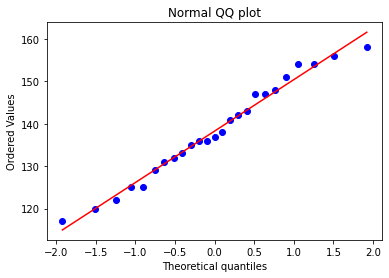

In [11]:
stats.probplot(test["Before"], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()
#CONCLUSION: NORMAL DISTRIBUTION

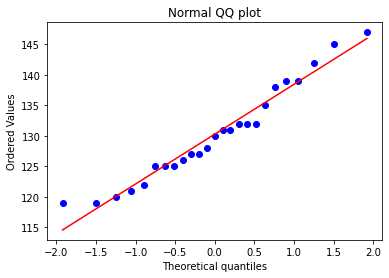

In [12]:
stats.probplot(test["After"], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()
#CONCLUSION: NORMAL DISTRIBUTION

<Figure size 432x288 with 0 Axes>

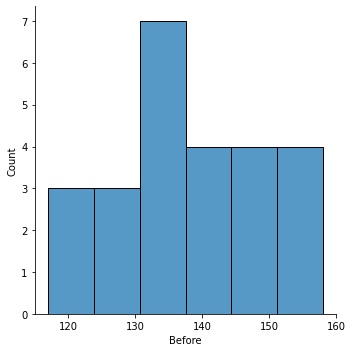

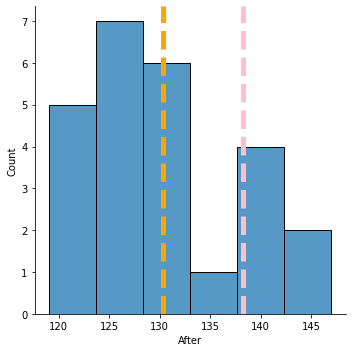

In [13]:
plt.figure()
ax1 = sns.displot(test['Before'])
ax2 = sns.displot(test['After'])
plt.axvline(np.mean(test['Before']), color='pink', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(test['After']), color='orange', linestyle='dashed', linewidth=5)
#COMP. MEAN

CRITERION

LEVEL OF SIGNIFICANCE

0.05 OR 5%


In [14]:
#TEST ANDERSON-DARLING
stats.anderson(test.Before, 'norm')
#result is 0.703 normal distribution

AndersonResult(statistic=0.1935666703752439, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [15]:
#TEST ANDERSON-DARLING
stats.anderson(test.After, 'norm')
#result is 0.703  normal distribution

AndersonResult(statistic=0.36089737752155315, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#STEP 3 : LETS TEST T!

Normal distribution? ok TEST T

TASK

HYPHOTESE

Ha is different ! : individual’s blood pressure has changed after exercising regularly for the past month (30-days)

Ho is equal = : individual’s blood pressure not changed after exercising regularly for the past month (30-days)

In [16]:
#TEST T 
#ind : independente
#rel: relacionadas
stat, p = stats.ttest_rel(test.Before, test.After)
print("T-statistic: {}".format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

T-statistic: 3.89
p-valor: 0.0006985894


#STEP 4 : CONCLUSION

CONCLUSION: STATISTICS, mean is different betwen Before and After

CONF. 95% 

Ha = p!0.05

Ho = p=0.05

T-statistic: 3.89
p-valor: 0.0006985894

CONCLUSION  t-test 

T-statistic: 3.89

p-valor: 0.0006985894

FRENDOM DEGREE: 2.064

#Since this p-value is different than 0.05, I have sufficient evidence to REJECT the NULL hypothesis

#I conclude that the individual’s blood pressure has changed after exercising regularly for the past month (30-days).

